In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/sarthak/Desktop/learning stuff/python/data-sciense ---jose-portlieo/data scienes project 1/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
df.iloc[0:5,6:7]

,twp
0,NEW HANOVER
1,HATFIELD TOWNSHIP
2,NORRISTOWN
3,NORRISTOWN
4,LOWER POTTSGROVE


In [5]:
df.iloc[0:5,3:4]

,zip
0,19525.0
1,19446.0
2,19401.0
3,19401.0
4,NaN


In [6]:
def valu(str):
    new_str = ''
    for i in str:
        for s in i:
            if s == ':':
                return new_str
            else:
                new_str += s
fs = df['title'].apply(valu)
df['Reason'] = fs
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [7]:
df['Reason'].value_counts()


EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

In [8]:
df['title'].nunique()

148

<AxesSubplot:xlabel='Reason', ylabel='count'>

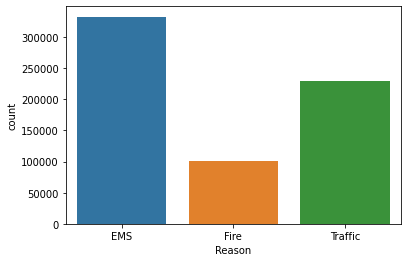

In [9]:
sns.countplot(x='Reason',data=df)

In [10]:
timestamp = pd.to_datetime(df['timeStamp'])
df['timeStamp'] = timestamp
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
def fun_hour(str):
    return str.hour

def fun_month(str):
    return str.month

def fun_day_of_week(str):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days[str.weekday()]


df['Hour'] = df['timeStamp'].apply(fun_hour)
df['Month'] = df['timeStamp'].apply(fun_month)
df['day_of_week'] = df['timeStamp'].apply(fun_day_of_week)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

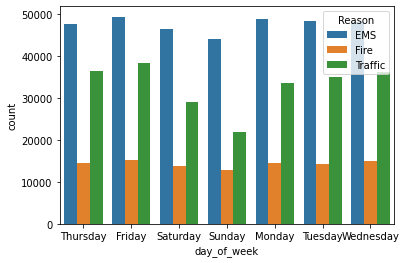

In [12]:
sns.countplot(x='day_of_week', hue='Reason',data=df)

In [13]:
df_groupby = df.groupby('Month')
df_groupby.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,day_of_week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


In [14]:
def fun_date(str):
    return str.date()


df['Date'] = df['timeStamp'].apply(fun_date)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,day_of_week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday,2015-12-10


In [15]:
df_groupby = df.groupby('day_of_week')
df_groupby.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Date
day_of_week,,,,,,,,,,,,,
Friday,102942,102942,102942,90348,102942,102942,102895,102942,102942,102942,102942,102942,102942
Monday,96745,96745,96745,85271,96745,96745,96707,96745,96745,96745,96745,96745,96745
Saturday,89452,89452,89452,78163,89452,89452,89404,89452,89452,89452,89452,89452,89452
Sunday,78859,78859,78859,69249,78859,78859,78823,78859,78859,78859,78859,78859,78859
Thursday,98683,98683,98683,86792,98683,98683,98652,98683,98683,98683,98683,98683,98683
Tuesday,97684,97684,97684,85911,97684,97684,97637,97684,97684,97684,97684,97684,97684
Wednesday,99157,99157,99157,87589,99157,99157,99111,99157,99157,99157,99157,99157,99157


In [16]:
df_groupby = df.groupby('Month')
df_groupby.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,day_of_week,Date
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


Month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lat, dtype: object

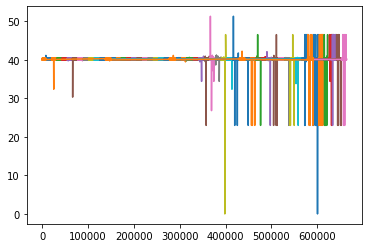

In [17]:
df_groupby['lat'].plot()

In [18]:
df_groupby = df.groupby('day_of_week')
df_groupby.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Date
day_of_week,,,,,,,,,,,,,
Friday,102942,102942,102942,90348,102942,102942,102895,102942,102942,102942,102942,102942,102942
Monday,96745,96745,96745,85271,96745,96745,96707,96745,96745,96745,96745,96745,96745
Saturday,89452,89452,89452,78163,89452,89452,89404,89452,89452,89452,89452,89452,89452
Sunday,78859,78859,78859,69249,78859,78859,78823,78859,78859,78859,78859,78859,78859
Thursday,98683,98683,98683,86792,98683,98683,98652,98683,98683,98683,98683,98683,98683
Tuesday,97684,97684,97684,85911,97684,97684,97637,97684,97684,97684,97684,97684,97684
Wednesday,99157,99157,99157,87589,99157,99157,99111,99157,99157,99157,99157,99157,99157


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

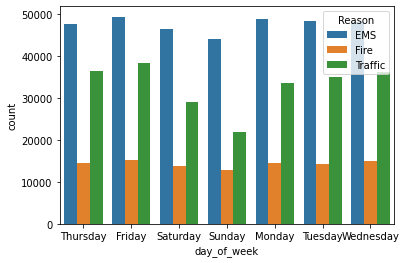

In [19]:
sns.countplot(x='day_of_week',data=df,hue='Reason')

<AxesSubplot:xlabel='day_of_week'>

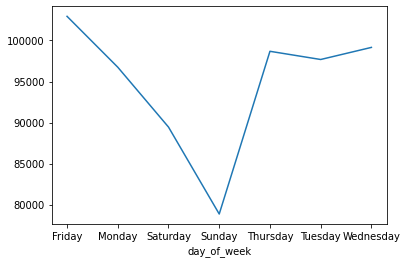

In [20]:
df_groupby.count()['lat'].plot()

<AxesSubplot:xlabel='Month', ylabel='count'>

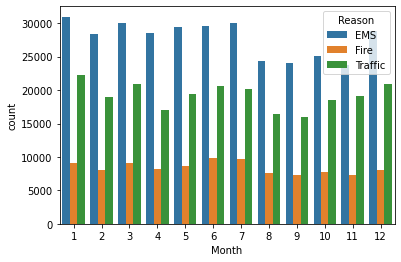

In [21]:
sns.countplot(x='Month',data=df,hue='Reason')

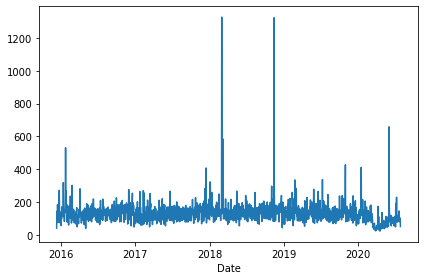

In [22]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

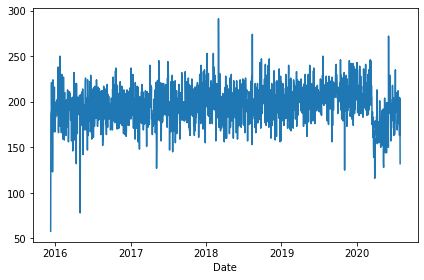

In [23]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [24]:
day_hour = df.groupby(by=['day_of_week','Hour']).count()['Reason'].unstack()
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<AxesSubplot:xlabel='Hour', ylabel='day_of_week'>

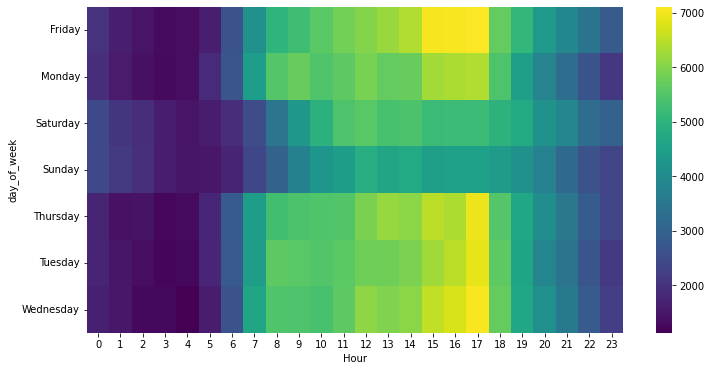

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap='viridis')

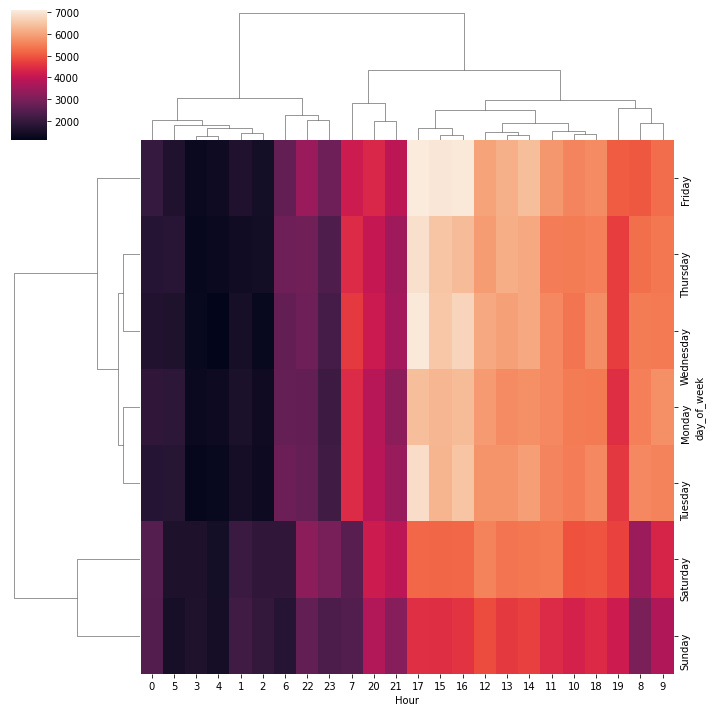

In [26]:
sns.clustermap(day_hour)

In [27]:
day_month = df.groupby(by=['day_of_week','Month']).count()['Reason'].unstack()
day_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Saturday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sunday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tuesday,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wednesday,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<AxesSubplot:xlabel='Month', ylabel='day_of_week'>

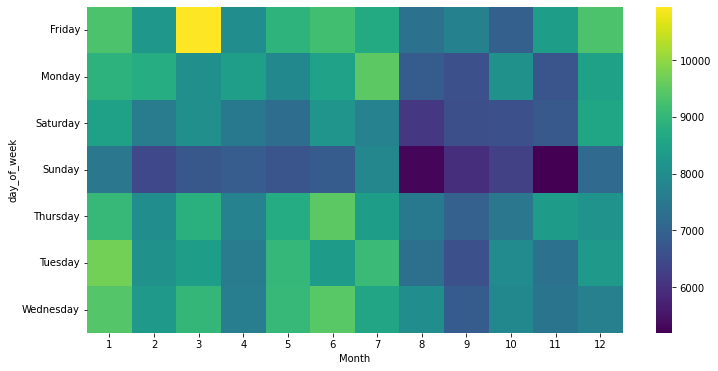

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month,cmap='viridis')

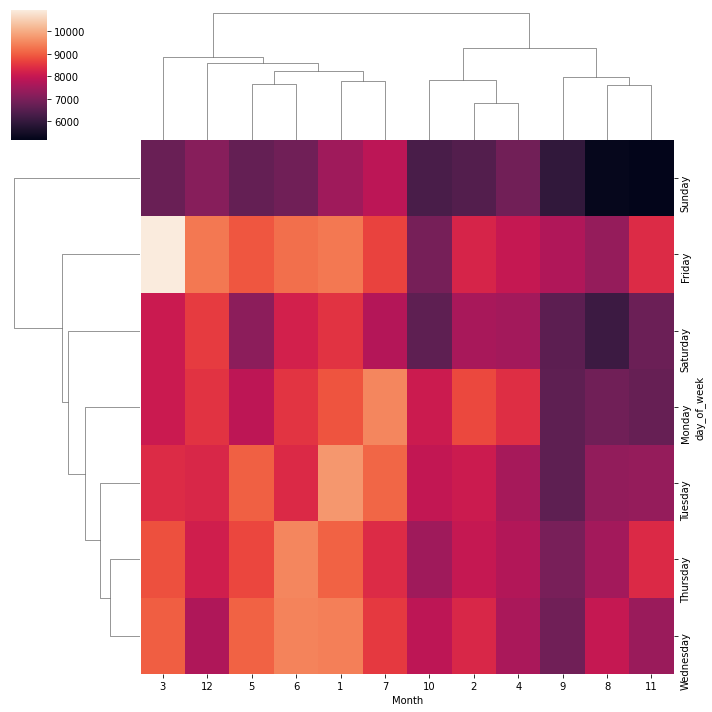

In [29]:
sns.clustermap(day_month)